<a href="https://colab.research.google.com/github/Pruthvi-Parmar/Data_Mining_Stuff/blob/main/LAB_8/DM_LAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data-income-age-group.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
import matplotlib.pyplot as plt

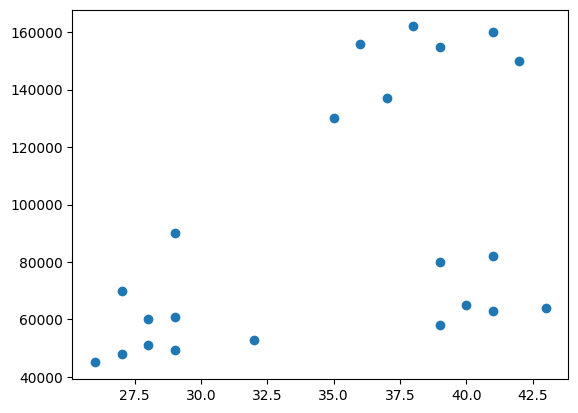

In [ ]:
plt.scatter(df['Age'], df['Income($)'])

In [ ]:
df2 = df.drop('Name', axis='columns')
df2

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


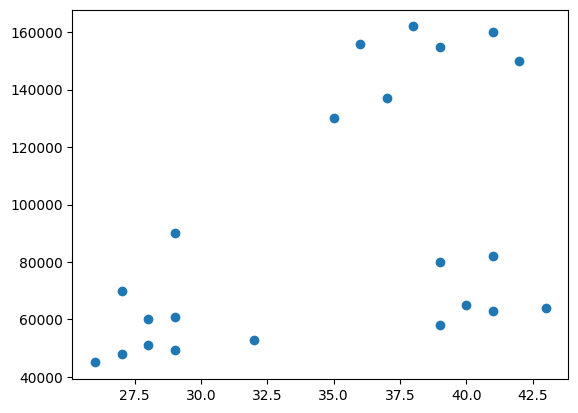

In [ ]:
plt.scatter(df2['Age'], df2['Income($)'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df2)
df2 = scaler.transform(df2)
df2 = pd.DataFrame(df2, columns=['Age', 'Income($)'])
df2

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df2)
y_predicted

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
df2['cluster'] = y_predicted
df2
d1 = df2[df2.cluster==0]
d2 = df2[df2.cluster==1]
d3 = df2[df2.cluster==2]

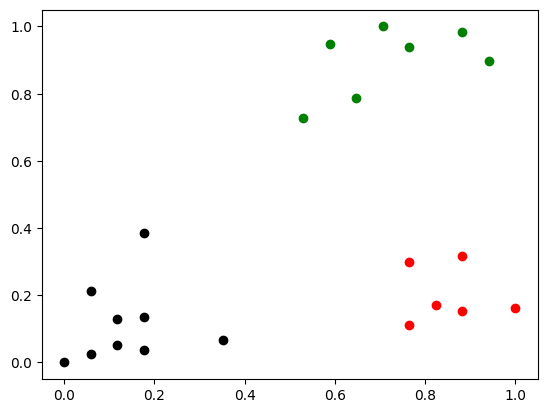

In [ ]:
plt.scatter(d1.Age, d1['Income($)'], color='green')
plt.scatter(d2.Age, d2['Income($)'], color='red')
plt.scatter(d3.Age, d3['Income($)'], color='black')

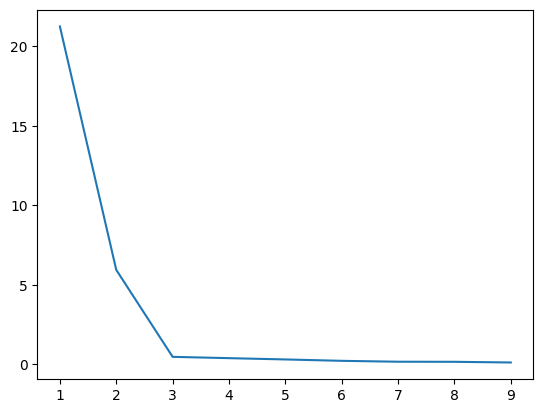

In [ ]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df2)
    sse.append(km.inertia_)
plt.plot(k_range, sse)

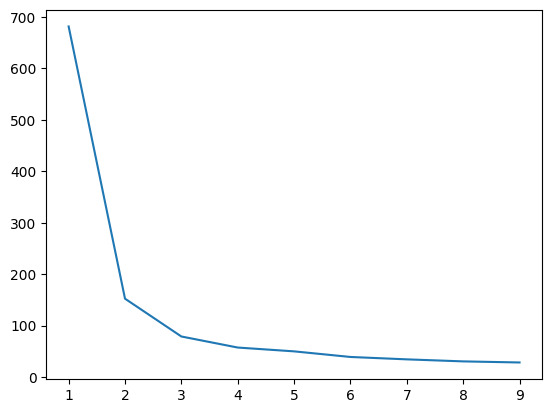

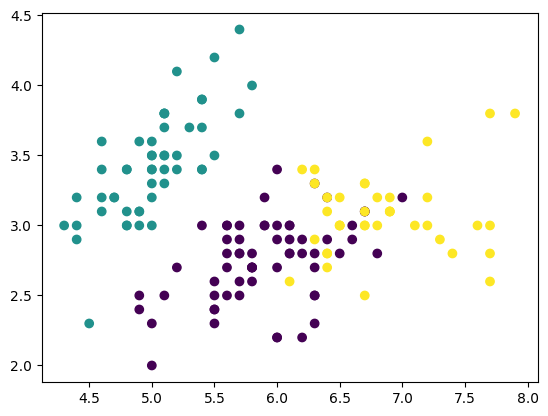

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import datasets


iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)


k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_iris)
    sse.append(km.inertia_)

plt.plot(k_range, sse)


plt.show()







km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_iris)


df_iris['cluster'] = y_predicted


plt.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], c=df_iris['cluster'])

plt.show()


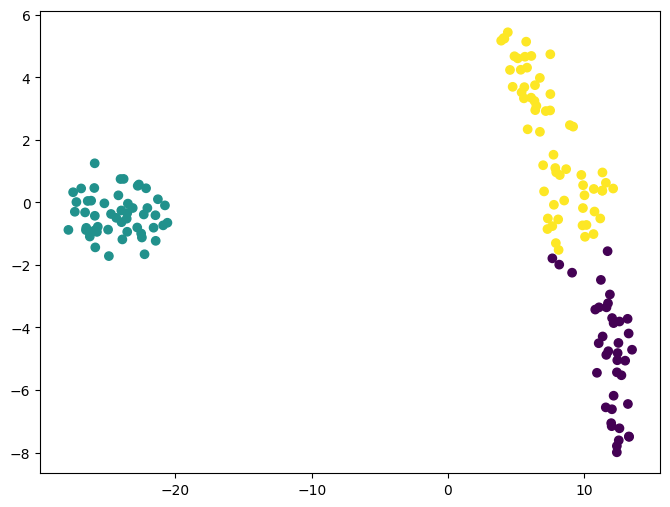

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.manifold import TSNE


iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(df_iris[iris.feature_names])


tsne_iris = TSNE(n_components=2, random_state=42)
df_iris_tsne = tsne_iris.fit_transform(df_iris[iris.feature_names])

plt.figure(figsize=(8, 6))
plt.scatter(df_iris_tsne[:, 0], df_iris_tsne[:, 1], c=df_iris['cluster'], cmap='viridis')

plt.show()


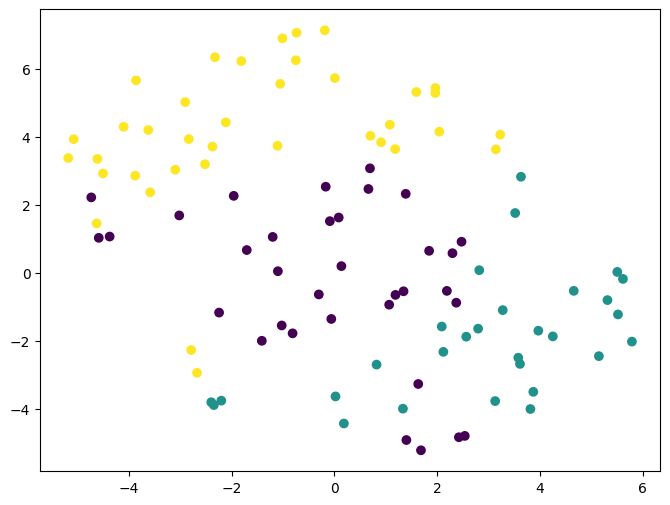

In [ ]:
df2 = pd.DataFrame(np.random.rand(100, 5), columns=['A', 'B', 'C', 'D', 'E'])  # Sample data
df2['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(df2)  # Apply KMeans clustering

# Apply t-SNE to df2
tsne = TSNE(n_components=2, random_state=42)
df2_tsne = tsne.fit_transform(df2.drop(columns=['cluster']))  # Drop 'cluster' column as it's not numeric

# Plotting t-SNE results for df2
plt.figure(figsize=(8, 6))
plt.scatter(df2_tsne[:, 0], df2_tsne[:, 1], c=df2['cluster'], cmap='viridis')

plt.show()